`models.explainers` regression example (boston dataset)
-----

### Load packages

In [1]:
from transparentai.models import explainers
from transparentai.datasets import load_boston

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Load & prepare data

In [2]:
data = load_boston()
X, Y = data.drop(columns='MEDV'), data['MEDV']

Split train test

In [3]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.33, random_state=42)

### Train classifier

In [4]:
regr = LinearRegression()
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Use `models.explainers.ModelExplainer` 

In [5]:
explainer = explainers.ModelExplainer(regr, X_train, model_type='linear')

In [6]:
explainer.explain_global_influence(X_train)

{'CRIM': 0.5633523411444785,
 'ZN': 0.6379522844695988,
 'INDUS': 0.3704442443391939,
 'CHAS': 0.45868520425416476,
 'NOX': 1.5814268302431083,
 'RM': 2.093970812886224,
 'AGE': 0.3131297388039477,
 'DIS': 2.50632850102869,
 'RAD': 1.7498508023564785,
 'TAX': 1.1538930195102095,
 'PTRATIO': 1.7526711958855317,
 'B': 0.6162228166915337,
 'LSTAT': 3.1297406441177027}

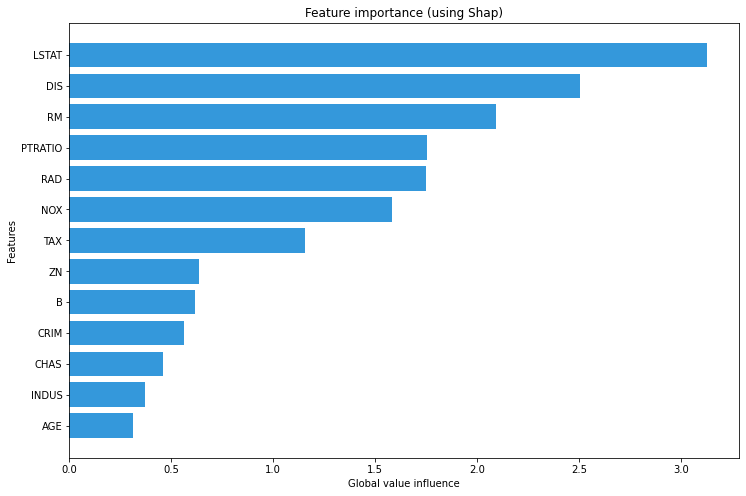

In [7]:
explainer.plot_global_explain()

In [8]:
explainer.explain_local_influence(X_valid.iloc[0])

{'CRIM = 0.0918': 0.41966538122558855,
 'ZN = 0.0': -0.4431676730229374,
 'INDUS = 4.05': -0.41980893692340976,
 'CHAS = 0.0': -0.24839342530696618,
 'NOX = 0.51': 0.7680326793152492,
 'RM = 6.416': 0.34601640100929754,
 'AGE = 84.1': -0.19481634665916459,
 'DIS = 2.6463': 1.5874410292441097,
 'RAD = 5.0': -1.0530323028426678,
 'TAX = 296.0': 0.9291953637765259,
 'PTRATIO = 16.6': 1.5432134548663796,
 'B = 395.5': 0.4362814191290741,
 'LSTAT = 9.04': 1.8932711857417912}

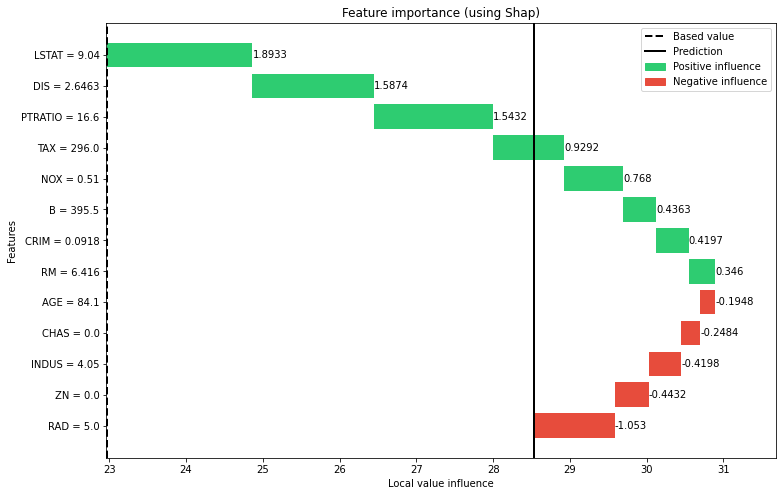

In [9]:
explainer.plot_local_explain(X_valid.iloc[0])